In [32]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [33]:
Encoder = keras.models.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation="elu"),
    keras.layers.Dense(64, activation="elu"),
    keras.layers.Dense(28)
])
Decoder = keras.models.Sequential([
    keras.layers.Dense(64, input_shape=(28,), activation="elu"),
    keras.layers.Dense(128, activation="elu"),
    keras.layers.Dense(784, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
inputs = keras.Input(shape=(784,))
h = Encoder(inputs)
outputs = Decoder(h)

autoEncoder = keras.Model(inputs, outputs)

In [35]:
autoEncoder.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [36]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

In [37]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [38]:
print(f"x_train shape : {x_train.shape}")
print(f"x_test shape : {x_test.shape}")

x_train shape : (60000, 28, 28)
x_test shape : (10000, 28, 28)


In [39]:
resized_x_train = x_train.reshape(-1, 784).astype("float32")
resized_x_test = x_test.reshape(-1, 784).astype("float32")

In [40]:
print(f"x_train shape : {resized_x_train.shape}")
print(f"x_test shape : {resized_x_test.shape}")

x_train shape : (60000, 784)
x_test shape : (10000, 784)


In [41]:
hist = autoEncoder.fit(resized_x_train, resized_x_train, batch_size=32, epochs=5, verbose=2, shuffle=True, validation_data=(resized_x_test, resized_x_test))

Epoch 1/5
1875/1875 - 15s - 8ms/step - loss: 0.0264 - val_loss: 0.0163
Epoch 2/5
1875/1875 - 20s - 11ms/step - loss: 0.0144 - val_loss: 0.0121
Epoch 3/5
1875/1875 - 12s - 7ms/step - loss: 0.0115 - val_loss: 0.0104
Epoch 4/5
1875/1875 - 20s - 11ms/step - loss: 0.0103 - val_loss: 0.0095
Epoch 5/5
1875/1875 - 21s - 11ms/step - loss: 0.0094 - val_loss: 0.0088


In [42]:
num_images = 10
sample_images = resized_x_test[:num_images]

In [43]:
encoded_images = Encoder(sample_images)
decoded_images = Decoder(encoded_images)

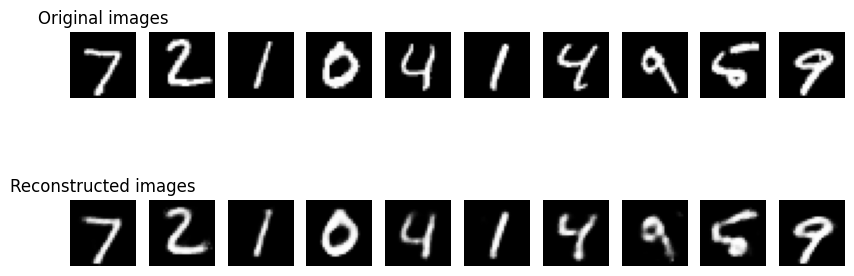

In [50]:
fig , axes = plt.subplots(2,num_images , figsize = (10,4))
for i in range(num_images):
  axes[0,i].imshow(sample_images[i].reshape(28,28) , cmap = "gray")
  axes[0,i].axis("off")

  axes[1,i].imshow(decoded_images[i].numpy().reshape(28,28) , cmap = "gray")
  axes[1,i].axis("off")
axes[0,0].set_title("Original images")
axes[1,0].set_title("Reconstructed images")
plt.show()